In [1]:
import crdb
from crdb.mpl import draw_references, draw_table, draw_logo
from crdb.experimental import convert_energy
from crdb.units import TeV
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cycler, colors as mcolors
from matplotlib.ticker import MultipleLocator, LogLocator

cc = (
    # standard markers for our plots
    cycler(marker=["o", "s", "D", "v", "^", "<", ">"])
    * cycler(color=mcolors.TABLEAU_COLORS)
)

plt.rcParams["lines.markersize"] = 5
plt.rcParams["axes.prop_cycle"] = cc
plt.rcParams["figure.constrained_layout.use"] = True
plt.rcParams["font.family"] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["font.size"] = 14

def format_ten_power(val, _):
    x = np.log10(val)
    if abs(x) < 2:
        return f"{val:g}"
    return f"$10^{{{x:g}}}$"

savefig = False

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'],'size':24})
rc('text', usetex=True)

def addbox(ax,x_list,y_list,**kwargs):
    '''
    ax = axis handle
    x_list = start and end in x axis
    y_list = start and end in y axis
    '''
    ax.fill_between(x_list,y_list[0],y_list[1],**kwargs)

In [3]:
elements = "AllParticles"
tabs = []
for energy_type in ("EKN","ETOT"):
    tab = crdb.query(
                elements,
                energy_type=energy_type,
                energy_convert_level=1,
            )
    if energy_type == "EKN":
        tab = convert_energy(tab, "EK")
    tabs.append(tab)
tab = np.concatenate(tabs).view(np.recarray)

with np.errstate(divide="ignore"):
    mask = (tab.err_sys[:, 0] > 0) & (tab.err_sta[:, 0] / tab.value < 0.5)
tab = tab[mask]

146.98 Mb downloaded


AlreadyLocked: [Errno 11] Resource temporarily unavailable

In [4]:
import pandas as pd
crdb_data = pd.read_csv('crdb_import.csv',skiprows=31,skip_blank_lines=True,header=None)


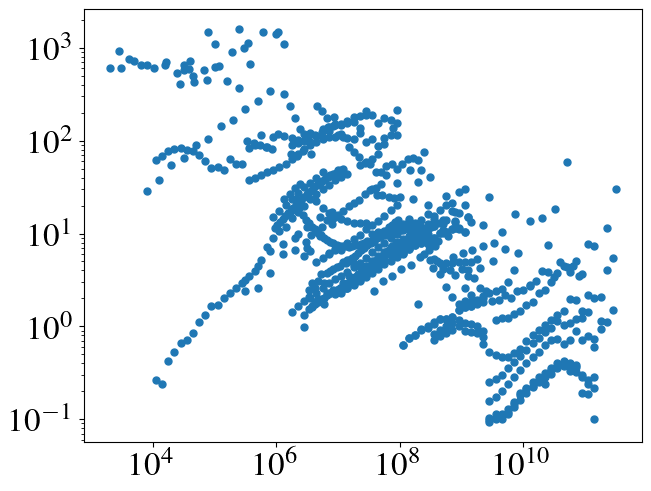

In [5]:
plt.scatter(crdb_data[14],crdb_data[18])
plt.xscale('log')
plt.yscale('log')

In [ ]:
fig, ax = plt.subplots(1,1,sharex=True,figsize=(12,7))
ma = (tab.quantity == elements)
t = tab[ma]
f = (t.e**2.5)
draw_table(t, factor=f, color='r', label=elements, ms=4)
ax.loglog()
ax.xaxis.set_major_locator(LogLocator(numticks=100))
ax.xaxis.set_major_formatter(format_ten_power)
ax.yaxis.set_major_locator(LogLocator(numticks=100))
ax.yaxis.set_major_formatter(format_ten_power)
ax.grid()
ax.set_xlabel('$E [GeV]$')
ax.set_ylabel(f"$E^{{2.5}}$ d$J$/d$E$ [GeV$^{{1.5}}$ (m$^{{-2}}$ s$^{{-1}}$ sr$^{{-1}}$)]")
ax.set_xlim(10**3,10**12)
grapes3_djde = [10*10**3,0.4*10**-1] #E**2.5 dj/dE
grapes3_etot = [3*10**3,10**6] #GeV
ax.set_ylim(10**-1,10**4)
addbox(ax,[10**3,10**7],[10**-2,10**4],alpha=0.3,color='blue',label='GRAPES-3 (SD)')
addbox(ax,[10**7,10**9],[10**-2,10**4],alpha=0.3,color='red',label='GRAPES-3 Radio Extension')
addbox(ax,[10**9,10**10],[10**-2,10**4],alpha=0.15,color='green',label='Possible future G3RA Extension')
ax.axvline(4*10**15/10**9,color='k',lw=2,label='knee')
ax.axvline(5*10**18/10**9,color='g',lw=2,label='Ankle')
plt.legend()
plt.savefig('/home/mugundhan/iitk/Work/RadioCR_ARG/cr_spectrum.png')

Help on function draw_table in module crdb.mpl:

draw_table(
    table: numpy.rec.recarray,
    factor: float = 1.0,
    label: Optional[str] = None,
    show_bin: bool = False,
    xunit: float = 1.0,
    sys_lw: float = 5,
    **kwargs: Any
) -> matplotlib.lines.Line2D
    Draw table with statistical and systematic error bars.

    Supports drawing values and upper limits.

    Parameters
    ----------
    table : array
        CRDB table.
    factor : array-like, optional
        Optional scaling factor for the y-coordinates. Default is 1.
    label : str, optional
        Optional label for the plot.
    show_bin : bool, optional
        If true, show horizontal error bars to indicate the energy bin.
    xunit: float, optional
        Use this to change the default scale of the energy axis (GeV or GV). For
        example, setting xunit = 1e3 produces a plot in TeV or TV. Default is 1.
    sys_lw : float, optional
        Line width for the error bar that represents systematic unc

/tmp/ipykernel_180175/857877665.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(frameon=False, ncol=2, loc="upper left", bbox_to_anchor=(1, 1))


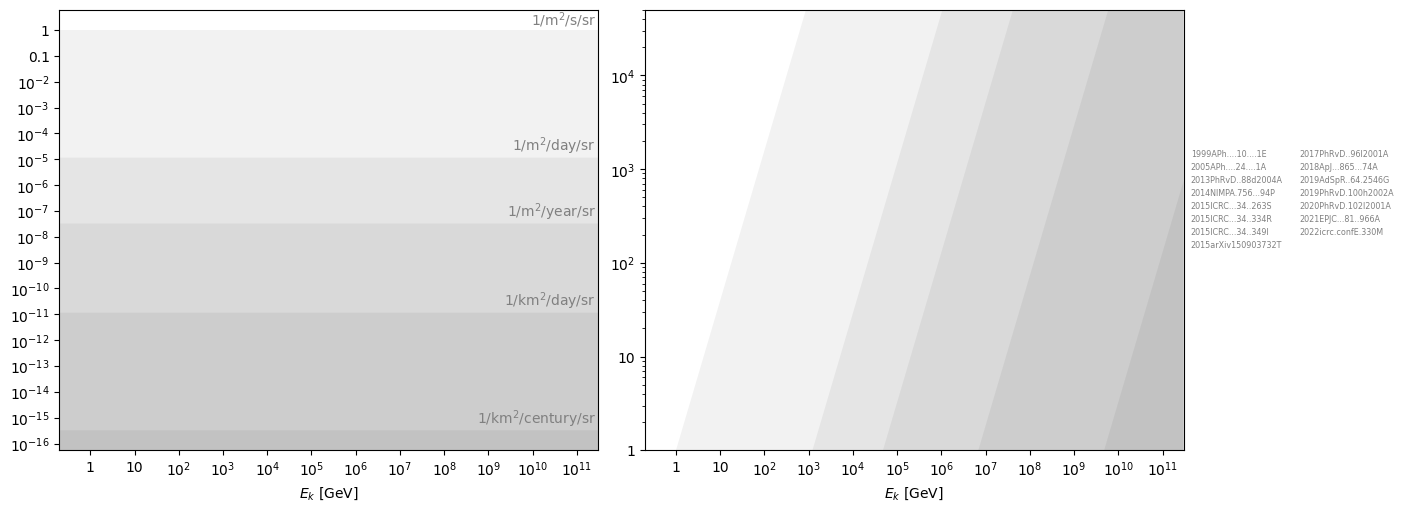

In [56]:
inclination = [0,10,20,30,40,50]
eff_protons_g3pa = [85,75,78,62,8,10]
g3pa_p_error = [7,7,8,9,4,10]

eff_he_g3pa = [73,78,66,30,2,0]
g3pa_he_error = [7,7,8,6,4,10]


eff_Fe_g3pa = [56,54,34,6,1,0]
g3pa_Fe_error = [5,4,7,2,1,10]

eff_protons_g3ra = [100,100,100,100,60,20]
g3ra_p_error = [1,1,1,2,12,20]
eff_helium_g3ra = [100,100,100,96,31,0]
g3ra_He_error = [1,1,1,4,7,20]
eff_Fe_g3ra = [100,100,98,62,11,0]
g3ra_Fe_error = [1,1,1,12,6,20]


<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_136172/711537449.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('EAS Inclination Angle ($^{\circ}$)')
/tmp/ipykernel_136172/711537449.py:18: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel('Detection Efficiency ($\%$)')
/tmp/ipykernel_136172/711537449.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


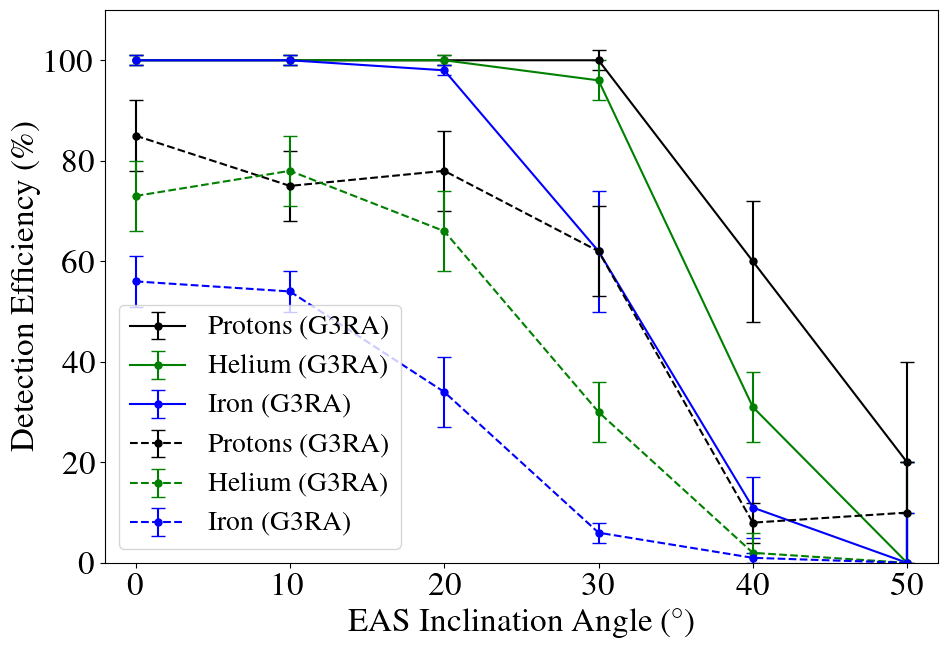

In [85]:
plt.figure(figsize=(10,7))
plt.errorbar(inclination, eff_protons_g3ra,g3ra_p_error,color='k',capsize=5,label='Protons (G3RA)')
plt.errorbar(inclination, eff_helium_g3ra,g3ra_He_error,color='g',capsize=5,label='Helium (G3RA)')
plt.errorbar(inclination, eff_Fe_g3ra,g3ra_Fe_error,color='b',capsize=5,label='Iron (G3RA)')

plt.errorbar(inclination, eff_protons_g3pa,g3pa_p_error,color='k',capsize=5,ls='dashed',label='Protons (G3RA)')
plt.errorbar(inclination, eff_he_g3pa,g3pa_he_error,color='g',capsize=5,ls='dashed',label='Helium (G3RA)')
plt.errorbar(inclination, eff_Fe_g3pa,g3pa_Fe_error,color='b',capsize=5,ls='dashed',label='Iron (G3RA)')

plt.legend(prop={'size':20})

plt.xticks(np.arange(0,60,10))
plt.yticks(np.arange(0,110,20))
plt.xlim(-2,52)
plt.ylim(0,110)
#plt.grid()
plt.xlabel('EAS Inclination Angle ($^{\circ}$)')
plt.ylabel('Detection Efficiency ($\%$)')
plt.tight_layout()